In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd 
from pandas import DataFrame
import math
import numpy as np
from numpy import genfromtxt
import sklearn
from collections import Counter
import sys
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

## Training data
We read data from the files and scale it using MinMax scaler.

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Assignment-2_Dataset/Datasets/Question-3/airfoil.csv', header=None)
y=data[5]
y=y.to_numpy()
X=data.to_numpy()
X=X[:,:5]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
# print(X)

# Gradient Descent
In this section we write the method for the gradient descent algorithm. For the termination condition, we choose a very small threshold value, and terminate if the differnce of the cost function for 2 successive iterations of gradient descent is less than the threshold.

In [0]:
def gradient_descent(X_train, y_train, theta, alpha):
    predictions = list()
    cost_list = list()
    cost_list.append(1e10)
    no_of_iterations=0
    m=len(y_train)
    while True:
        temp = np.dot(X_train, theta)
        error = temp - y_train
        predictions.append(temp)
        cost = 1/(2*m) * np.dot(error.T, error)
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(X_train.T, error))
        no_of_iterations = no_of_iterations + 1
        if(cost_list[no_of_iterations-1]-cost_list[no_of_iterations] < 1e-9):
            break

    cost_list.pop(0)
    return predictions, cost_list, theta, no_of_iterations

### In the below section, we split the training data into train and test sets. Then we append a column of ones to the training set and initialize theta with random values.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape)
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
print(X_train.shape)
print(X_test.shape)
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
print(X_test.shape)
np.random.seed(10)
theta = np.random.rand(X_train.shape[1])
print(y_train.shape)

(961, 5)
(961, 6)
(241, 5)
(241, 6)
(961,)


## Learning rate (alpha) = 0.005

In [0]:
alpha = 0.005

In [0]:
prediction_list, cost_list, theta, no_of_iterations = gradient_descent(X_train, y_train, theta, alpha)

### We find the predicted values set.

In [0]:
y_predicted=np.dot(X_test,theta)

## Graph plot 
The graph shown below depicts how the cost decreases as the number of iterations of gradient descent increases for alpha = 0.005

Text(0, 0.5, 'Cost')

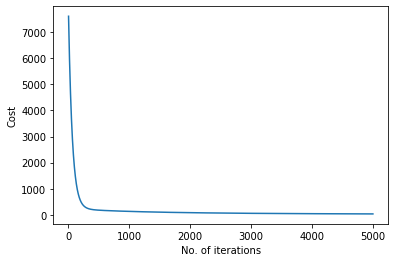

In [0]:
cost = list(cost_list)
cost = cost[:5000]
n_iterations = [x for x in range(1,no_of_iterations+1)]
n_iterations = n_iterations[:5000]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

## Result
The r2 score is calculated and found out to be **0.538**

In [0]:
r2_score(y_test,y_predicted)

0.5382701351103933

## Learning rate (alpha) = 0.01

In [0]:
alpha = 0.01

In [0]:
prediction_list, cost_list, theta, no_of_iterations = gradient_descent(X_train, y_train, theta, alpha)

### We find the predicted values set.

In [0]:
y_predicted1=np.dot(X_test,theta)

## Graph plot 
The graph shown below depicts how the cost decreases as the number of iterations of gradient descent increases for alpha = 0.01

Text(0, 0.5, 'Cost')

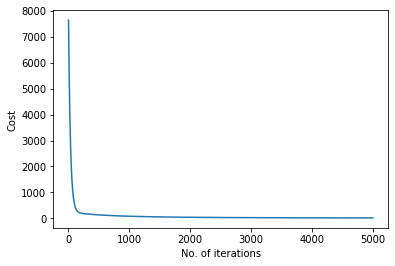

In [0]:
cost = list(cost_list)
cost = cost[:5000]
n_iterations = [x for x in range(1,no_of_iterations+1)]
n_iterations = n_iterations[:5000]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

## Result
The r2 score is calculated and found out to be **0.480**

In [0]:
r2_score(y_test,y_predicted1)

0.48059777678167115

## Learning rate (alpha) = 0.1

In [0]:
alpha = 0.1

In [0]:
prediction_list, cost_list, theta, no_of_iterations = gradient_descent(X_train, y_train, theta, alpha)

### We find the predicted values set.

In [0]:
y_predicted2=np.dot(X_test,theta)

## Graph plot 
The graph shown below depicts how the cost decreases as the number of iterations of gradient descent increases for alpha = 0.1

Text(0, 0.5, 'Cost')

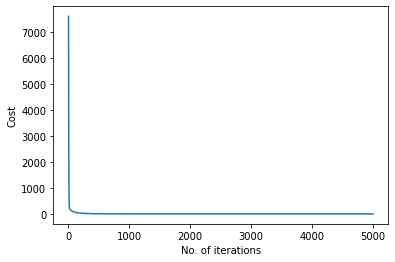

In [0]:
cost = list(cost_list)
cost = cost[:5000]
n_iterations = [x for x in range(1,no_of_iterations+1)]
n_iterations = n_iterations[:5000]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

## Result
The r2 score is calculated and found out to be **0.61**

In [0]:
r2_score(y_test,y_predicted2)

0.6155569547805817

## We see that we get different accuracy scores for different values of alpha chosen. 

## Now we run our algorithm 3 times for different values of theta keeping alpha constant.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# print(X_train.shape)
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
# print(X_train.shape)
# print(X_test.shape)
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
# print(X_test.shape)
np.random.seed(10)
theta = np.random.rand(X_train.shape[1])
# print(y_train.shape)
alpha = 0.005
prediction_list1, cost_list1, theta1, no_of_iterations = gradient_descent(X_train, y_train, theta, alpha)
y_predicted1=np.dot(X_test,theta1)
r2_score(y_test,y_predicted1)

0.48060111379601667

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# print(X_train.shape)
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
# print(X_train.shape)
# print(X_test.shape)
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
# print(X_test.shape)
np.random.seed(10)
theta = np.random.rand(X_train.shape[1])
# print(y_train.shape)
alpha = 0.005
prediction_list2, cost_list2, theta2, no_of_iterations = gradient_descent(X_train, y_train, theta, alpha)
y_predicted2=np.dot(X_test,theta2)
r2_score(y_test,y_predicted2)

0.48059996487412004

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# print(X_train.shape)
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
# print(X_train.shape)
# print(X_test.shape)
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
# print(X_test.shape)
np.random.seed(10)
theta = np.random.rand(X_train.shape[1])
# print(y_train.shape)
alpha = 0.005
prediction_list3, cost_list3, theta3, no_of_iterations = gradient_descent(X_train, y_train, theta, alpha)
y_predicted3=np.dot(X_test,theta3)
r2_score(y_test,y_predicted3)

0.4805999486272088

In [ ]:
n_iterations = [x for x in range(1,no_of_iterations+1)]
n_iterations = n_iterations[:5000]

cost_list1=list(cost_list1)
cost_list1 = cost_list1[:5000]
cost_list2=list(cost_list2)
cost_list2 = cost_list2[:5000]
cost_list3=list(cost_list3)
cost_list3 = cost_list3[:5000]
plt.plot(n_iterations,cost_list1, 'r--')
plt.plot(n_iterations,cost_list2, 'g*')
plt.plot(n_iterations,cost_list3, 'b+')
plt.legend(loc='best')
plt.axis([0, 300, 0, 1500])
plt.xlabel('Number of iterations')
plt.ylabel('Cost function value')
# plt.figure(figsize=(20,17))
plt.show()

## Q3. If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem.
(a) When 0-0.5% of values are missing of that feature : We will take the mean or mode of that feature and replace it with the missing values.

(b) When 8-10% of values are missing of that feature : We will take the mean or mode of that feature and replace it with the missing values.

(c) When 60-70% of values are missing of that feature : We will drop that feature and continue with the rest of the features.